In [1]:
# Import pandas
import pandas as pd

# Load the dataset
file_path = "reviews.csv"
df = pd.read_csv(file_path)

# Show available columns
print("Available columns:", df.columns.tolist())


Available columns: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']


In [2]:
pd.set_option('display.max_colwidth', None)  # Set to None for unlimited width

print(df)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [3]:
# Extract and display the review text
reviews = df['Summary'].dropna().astype(str)
print("\nSample reviews:")
print(reviews)

# Extract and display the review text
reviews = df['Text'].dropna().astype(str)
print("\nSample reviews:")
print(reviews)


Sample reviews:
0                      Good Quality Dog Food
1                          Not as Advertised
2                      "Delight" says it all
3                             Cough Medicine
4                                Great taffy
                         ...                
568449                   Will not do without
568450                          disappointed
568451              Perfect for our maltipoo
568452    Favorite Training and reward treat
568453                           Great Honey
Name: Summary, Length: 568427, dtype: object

Sample reviews:
0                                                                                                                                                                                                                                                               I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and

In [4]:
# Lowercase conversion
def convert_to_lowercase(text):
 return text.lower()
df["lowercased"] = reviews.apply(convert_to_lowercase)
# Display column content without truncation
pd.set_option('display.max_colwidth', None) # Set to None for unlimited width
print(df["lowercased"])

0                                                                                                                                                                                                                                                               i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.
1                                                                                                                                                                                                                                                                                                                                        product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intend

In [5]:
import re

# Function to remove URLs safely
def remove_urls(text):
    if isinstance(text, str):
        return re.sub(r'http\S+|www\S+', '', text)
    return text  # Return as-is if not a string

# Apply to the column
df["urls_removed"] = df["lowercased"].apply(remove_urls)

# Display column without truncation
pd.set_option('display.max_colwidth', None)
print(df["urls_removed"])

0                                                                                                                                                                                                                                                               i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.
1                                                                                                                                                                                                                                                                                                                                        product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intend

In [6]:
# Removal of HTML tags
from bs4 import BeautifulSoup
# extracts only the text, removing all HTML tags
def remove_html_tags(text):
    if isinstance(text, str):
         return BeautifulSoup(text, "html.parser").get_text()
    return text  # Return as-is if not a string
   
df["html_removed"] = df["urls_removed"].apply(remove_html_tags)
# Display column content without truncation
pd.set_option('display.max_colwidth', None) # Set to None for unlimited width
print(df["html_removed"])

C:\Users\Irfan\AppData\Local\Temp\ipykernel_22008\2639437961.py:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


0                                                                                                                                                                                                                                                               i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.
1                                                                                                                                                                                                                                                                                                                                        product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intend

In [7]:
# Removal of emojis (if any)
import emoji
# replace emoji with ''
def remove_emojis(text):
    if isinstance(text, str):
         return emoji.replace_emoji(text, replace='')
    return text  # Return as-is if not a string
 
df["emojis_removed"] = df["html_removed"].apply(remove_emojis)
# Display column content without truncation
df["emojis_removed"].astype(str)
pd.set_option('display.max_colwidth', None) # Set to None for unlimited width
print(df["emojis_removed"])

0                                                                                                                                                                                                                                                               i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.
1                                                                                                                                                                                                                                                                                                                                        product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intend

In [8]:
import re

# Slang dictionary (as provided)
slang_dict = {
    "tbh": "to be honest",
    "omg": "oh my god",
    "lol": "laugh out loud",
    "idk": "I don't know",
    "brb": "be right back",
    "btw": "by the way",
    "imo": "in my opinion",
    "smh": "shaking my head",
    "fyi": "for your information",
    "np": "no problem",
    "ikr": "I know right",
    "asap": "as soon as possible",
    "bff": "best friend forever",
    "gg": "good game",
    "hmu": "hit me up",
    "rofl": "rolling on the floor laughing",
    "w": "win",
    "naah": "No",
    "ucc": "Uniten Customer Care",
    "tpi": "tapi",
    "ni": "ini"
}

# Function to replace slang safely
def replace_slang(text):
    if not isinstance(text, str):
        return text  # Return unchanged if not a string
    escaped_slang_words = [re.escape(word) for word in slang_dict]
    slang_pattern = r'\b(' + '|'.join(escaped_slang_words) + r')\b'

    def replace_match(match):
        slang_word = match.group(0)
        return slang_dict[slang_word.lower()]

    return re.sub(slang_pattern, replace_match, text, flags=re.IGNORECASE)

# Apply the function safely
df["slangs_replaced"] = df["emojis_removed"].apply(replace_slang)

# Optional: display full text
pd.set_option('display.max_colwidth', None)
print(df["slangs_replaced"])


0                                                                                                                                                                                                                                                               i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than  most.
1                                                                                                                                                                                                                                                                                                                                        product arrived labeled as jumbo salted peanuts...the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intend

In [9]:
import re
import string

def remove_punctuation(text):
    if not isinstance(text, str):
        return text
    # Replace newlines with space
    text = re.sub(r'[\n\r]+', ' ', text)
    # Remove punctuation except apostrophe
    punctuation_to_remove = string.punctuation.replace("'", "")
    text = re.sub(r"[{}]".format(re.escape(punctuation_to_remove)), " ", text)
    # Collapse multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the function to the Text column
df["punctuations_removed"] = df["slangs_replaced"].apply(remove_punctuation)

# Print a sample of the results
print(df[["Text", "punctuations_removed"]].head())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Text  \
0                                                                                                                                                                                                                                                        I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates thi

In [10]:
import re

# Contractions dictionary
contractions_dict = {
    "wasn't": "was not", "isn't": "is not", "aren't": "are not", "weren't": "were not",
    "doesn't": "does not", "don't": "do not", "didn't": "did not", "can't": "cannot",
    "couldn't": "could not", "shouldn't": "should not", "wouldn't": "would not", "won't": "will not",
    "haven't": "have not", "hasn't": "has not", "hadn't": "had not", "i'm": "i am",
    "you're": "you are", "he's": "he is", "she's": "she is", "it's": "it is",
    "we're": "we are", "they're": "they are", "i've": "i have", "you've": "you have",
    "we've": "we have", "they've": "they have", "i'd": "i would", "you'd": "you would",
    "he'd": "he would", "she'd": "she would", "we'd": "we would", "they'd": "they would",
    "i'll": "i will", "you'll": "you will", "he'll": "he will", "she'll": "she will",
    "we'll": "we will", "they'll": "they will", "let's": "let us", "that's": "that is",
    "who's": "who is", "what's": "what is", "where's": "where is", "when's": "when is",
    "why's": "why is"
}

# Compile contraction pattern
escaped_contractions = [re.escape(c) for c in contractions_dict.keys()]
joined_contractions = "|".join(escaped_contractions)
contractions_pattern = re.compile(r'\b(' + joined_contractions + r')\b', flags=re.IGNORECASE)

# Function to replace contractions safely
def replace_contractions(text):
    if not isinstance(text, str):
        return text

    def replace_match(match):
        matched_word = match.group(0)
        return contractions_dict[matched_word.lower()]
    
    return contractions_pattern.sub(replace_match, text)

# Apply to DataFrame
df["contractions_replaced"] = df["punctuations_removed"].apply(replace_contractions)

# Display full content
pd.set_option('display.max_colwidth', None)
print(df["contractions_replaced"])


0                                                                                                                                                                                                                                            i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most
1                                                                                                                                                                                                                                                                                                                       product arrived labeled as jumbo salted peanuts the peanuts were actually small sized unsalted not sure if this was an error or if the vendor intended to represent the product as jumbo
2     

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):
        return ' '.join(word for word in text.split() if word.lower() not in stop_words)
    return text

df["stopwords_removed"] = df["contractions_replaced"].apply(remove_stopwords)

print(df["stopwords_removed"])

0                                                                                                                                  bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
1                                                                                                                                                                 product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
2         confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story c lewis' lion witch wardrobe treat seduces edmund selling brother sisters witch
3                                                                                                               

In [12]:
def fast_tokenize(text):
    if isinstance(text, str):
        return text.split()
    return []

df["tokens"] = df["stopwords_removed"].apply(fast_tokenize)
print(df["tokens"])

0                                                                                                                                                   [bought, several, vitality, canned, dog, food, products, found, good, quality, product, looks, like, stew, processed, meat, smells, better, labrador, finicky, appreciates, product, better]
1                                                                                                                                                                                       [product, arrived, labeled, jumbo, salted, peanuts, peanuts, actually, small, sized, unsalted, sure, error, vendor, intended, represent, product, jumbo]
2         [confection, around, centuries, light, pillowy, citrus, gelatin, nuts, case, filberts, cut, tiny, squares, liberally, coated, powdered, sugar, tiny, mouthful, heaven, chewy, flavorful, highly, recommend, yummy, treat, familiar, story, c, lewis', lion, witch, wardrobe, treat, seduces, edmund, selling, brother, siste

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))  # For unigrams + bigrams
X = vectorizer.fit_transform(df["stopwords_removed"])


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your cleaned text is in this column
texts = df["stopwords_removed"].astype(str)

# Create vectorizer and transform text
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(texts)

# Check shape
print(X_bow.shape)  # (num_docs, num_unique_words)

(568454, 131875)


In [15]:
# Get list of feature words
feature_names = vectorizer.get_feature_names_out()

# Example: show top 10 words
print(feature_names[:10])


['00' '000' '0000' '000001' '00001' '000013' '0000soo' '0001'
 '000111052bulk' '0001bottling']


In [16]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Load the dataset
df = pd.read_csv('reviews.csv')
# ------------------------
# 1. Bag of Words
# ------------------------
bow_vectorizer = CountVectorizer(max_features=5000)  # you can adjust max_features
bow_features = bow_vectorizer.fit_transform(texts)

# bow_features is a sparse matrix
print("BoW shape:", bow_features.shape)

# ------------------------
# 2. TF-IDF
# ------------------------
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(texts)

print("TF-IDF shape:", tfidf_features.shape)


BoW shape: (568454, 5000)
TF-IDF shape: (568454, 5000)


In [17]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Assuming you have a DataFrame called df
analyzer = SentimentIntensityAnalyzer()

# Apply VADER to the 'Text' column
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

df['vader_score'] = texts.apply(vader_sentiment)

# Assign sentiment based on compound score
def get_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_score'].apply(get_sentiment_label)

In [18]:
# Create true sentiment label from score (e.g., 4-5 = pos, 1-2 = neg, 3 = neutral)
def get_label_from_score(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

df['true_sentiment'] = df['Score'].apply(get_label_from_score)

In [19]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Train model on the entire dataset
model = MultinomialNB()
model.fit(X, df['Score'])

# Predict for all rows
y_pred = model.predict(X)

# Map predictions to sentiment labels
sentiment_mapping = {
    1: "negative",
    2: "negative",
    3: "neutral",
    4: "positive",
    5: "positive"
}
y_pred_mapped = [sentiment_mapping[label] for label in y_pred]

# Write predictions to a new column in the original DataFrame
df["nb_sentiment"] = y_pred_mapped

# Confirm everything is mapped
print("Unique Naive Bayes sentiment values after mapping:", df['nb_sentiment'].unique())

Unique Naive Bayes sentiment values after mapping: ['positive' 'neutral' 'negative']


In [21]:
# Then you can compute accuracy
from sklearn.metrics import accuracy_score, classification_report

print("Unique true_sentiment values:", df['true_sentiment'].unique())
print("Unique VADER sentiment values:", df['vader_sentiment'].unique())
print("Unique Naive Bayes sentiment values:", df['nb_sentiment'].unique())

print("VADER Accuracy:", accuracy_score(df['true_sentiment'], df['vader_sentiment']))
print("Naive Bayes Accuracy:", accuracy_score(df['true_sentiment'], df['nb_sentiment']))

Unique true_sentiment values: ['positive' 'negative' 'neutral']
Unique VADER sentiment values: ['positive' 'negative' 'neutral']
Unique Naive Bayes sentiment values: ['positive' 'neutral' 'negative']
VADER Accuracy: 0.7915996720930806
Naive Bayes Accuracy: 0.7993452416554374


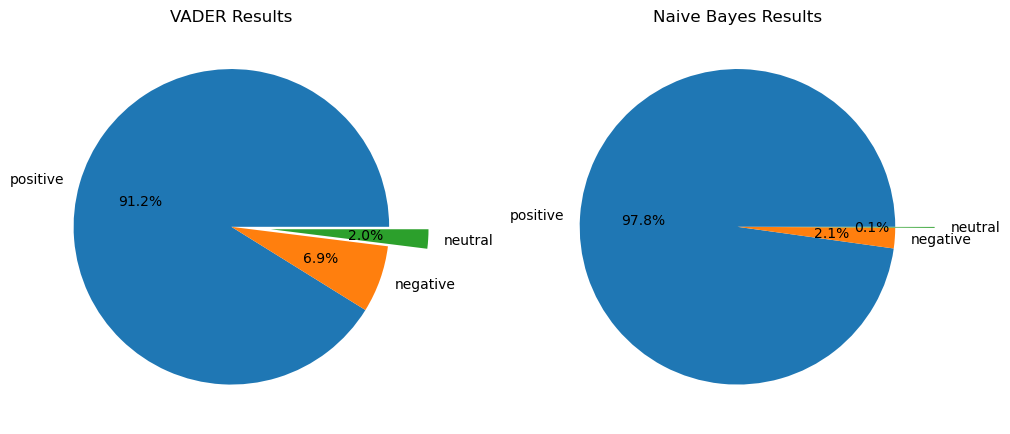

In [27]:
vader_counts = df["vader_sentiment"].value_counts()
nb_counts = df["nb_sentiment"].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

# VADER sentiment pie chart
plt.subplot(1,3,2)
plt.title("VADER Results")
plt.pie(vader_counts.values, labels=vader_counts.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# Naive Bayes sentiment pie chart
plt.subplot(1,3,3)
plt.title("Naive Bayes Results")
plt.pie(nb_counts.values, labels=nb_counts.index, explode=(0, 0, 0.25), autopct='%1.1f%%', shadow=False)

plt.tight_layout()
plt.show()

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
# VADER accuracy
vader_accuracy = accuracy_score(df["true_sentiment"], df["vader_sentiment"])
print("VADER Accuracy:", round(vader_accuracy * 100, 2), "%")

# Full classification report
print("VADER Report:")
print(classification_report(df["true_sentiment"], df["vader_sentiment"]))

VADER Accuracy: 79.16 %
VADER Report:
              precision    recall  f1-score   support

    negative       0.58      0.28      0.38     82037
     neutral       0.12      0.03      0.05     42640
    positive       0.82      0.96      0.89    443777

    accuracy                           0.79    568454
   macro avg       0.51      0.42      0.44    568454
weighted avg       0.73      0.79      0.75    568454



In [33]:
# VADER accuracy
vader_accuracy = accuracy_score(df["true_sentiment"], df["nb_sentiment"])
print("Naive Bayes Accuracy:", round(vader_accuracy * 100, 2), "%")

# Full classification report
print("Naive Bayes Report:")
print(classification_report(df["true_sentiment"], df["nb_sentiment"]))

Naive Bayes Accuracy: 79.93 %
Naive Bayes Report:
              precision    recall  f1-score   support

    negative       0.91      0.13      0.23     82037
     neutral       0.78      0.01      0.02     42640
    positive       0.80      1.00      0.89    443777

    accuracy                           0.80    568454
   macro avg       0.83      0.38      0.38    568454
weighted avg       0.81      0.80      0.73    568454



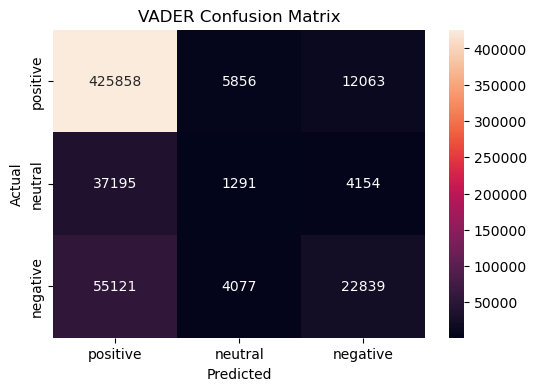

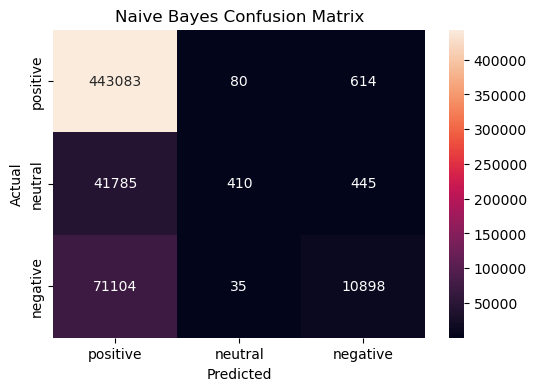

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# VADER Confusion Matrix
vader_cm = confusion_matrix(df["true_sentiment"], df["vader_sentiment"], labels=["positive", "neutral", "negative"])
plt.figure(figsize=(6,4))
sns.heatmap(vader_cm, annot=True, fmt='d', xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("VADER Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Naive Bayes Confusion Matrix
vader_cm = confusion_matrix(df["true_sentiment"], df["nb_sentiment"], labels=["positive", "neutral", "negative"])
plt.figure(figsize=(6,4))
sns.heatmap(vader_cm, annot=True, fmt='d', xticklabels=["positive", "neutral", "negative"], yticklabels=["positive", "neutral", "negative"])
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Muhammad Irfan Ammar bin Zaharudin SW01082532

Discussion:  
Both VADER and Naive Bayes are strong at correctly identifying positive sentiment. However, both still struggle with the neutral category, frequently misclassifying neutral instances as positive.

VADER shows a better ability to identify negative sentiment compared to Naive Bayes. Naive Bayes, while very accurate for positive sentiment, has a stronger bias towards classifying instances as positive, leading to poorer performance on both neutral and negative categories.

In summary, VADER provides a more balanced classification across all sentiment categories than Naive Bayes in this specific case.